In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nyc_squirrels=pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250304.csv')

In [3]:
nyc_squirrels.head()


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [4]:
nyc_squirrels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [5]:
hectare = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Hectare_Grid_20250304.csv')

In [6]:
hectare.head()

,the_geom,id,xmin,xmax,ymin,ymax
0,MULTIPOLYGON (((-73.95816284567162 40.80102139...,82,989030.73113,989358.81512,231243.27134,231571.35533
1,MULTIPOLYGON (((-73.95712568765475 40.80058581...,83,989358.81512,989686.89911,231243.27134,231571.35533
2,MULTIPOLYGON (((-73.95608854321127 40.80015023...,84,989686.89911,990014.98310,231243.27134,231571.35533
3,MULTIPOLYGON (((-73.9550514123412 40.799714636...,85,990014.98310,990343.06709,231243.27134,231571.35533
4,MULTIPOLYGON (((-73.9540142950446 40.799279030...,86,990343.06709,990671.15108,231243.27134,231571.35533


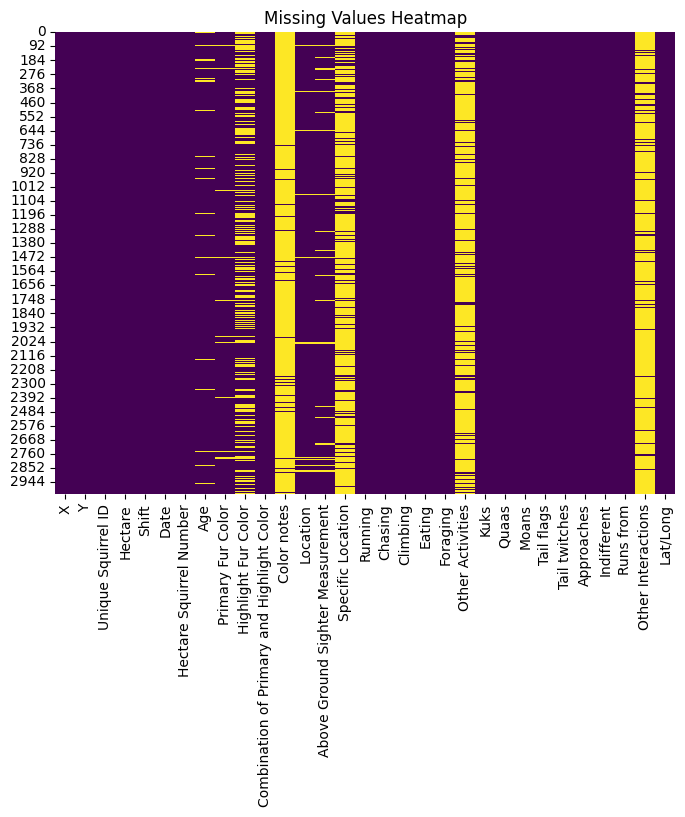

In [7]:
#missingness
plt.figure(figsize=(8,6))
sns.heatmap(nyc_squirrels.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('Missing Squirrel Data', dpi=300)
plt.show()

In [8]:
#adding a new cell to test branch

Natural Language Processing

In [ ]:
import nltk
nltk.download('all')

from nltk.tokenize import sent_tokenize, word_tokenize 

# imports and setup
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

import pandas as pd
from nltk.probability import FreqDist

from nltk.corpus import stopwords

In [14]:
#inporting the dataset
stories_mw = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Stories.csv')

In [15]:
stories_mw.head()

,Hectare,Shift,Date,Note Squirrel & Park Stories,Story Topic: Squirrel Experience or Squirrel Story,Story Topic: Park Experience or Census Taker Story,Story Topic: Dogs,Story Topic: Other Animals,Story Topic: Accidental Poems,Story Topic: Squirrels Acting Odd,Story Topic: Census Takers Recognized,Story Topic: Other
0,01A,PM,10142018,Observed a squirrel with a cache of peanuts th...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01A,AM,10182018,"Lots of pedestrians and vehicular traffic, foo...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,01A,PM,10202018,Three of the pedicab drivers (14 pedicabs line...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,01A,AM,10072018,Squirrels were in surrounding grass areas/tree...,True,True,NaN,True,NaN,NaN,NaN,Birds
4,01B,AM,10122018,"""SQUIRREL APALOOZA""\n\n6+7 were playing on tre...",True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#tokenizing and turning the data into a text data type readable by the nltk package
stories_text_mw = pd.Series(stories_mw['Note Squirrel & Park Stories'])
stories_string_mw = ' '.join(stories_text_mw)

token_mw = word_tokenize(stories_string_mw)
nltk_mw = nltk.Text(token_mw)

In [20]:
#looking at where "squirrel" shows up, just for funsies
nltk_mw.concordance('squirrel')

Displaying 25 of 499 matches:
                        Observed a squirrel with a cache of peanuts that he wa
ain in Columbus Circle , but not a squirrel to be seen . A bike rental worker 
rels from leaving grassy area . `` SQUIRREL APALOOZA '' 6+7 were playing on tr
ee trunk Nests spotted : 111 [ ? ] Squirrel # 11 : There was a bag of nuts or 
tree - pigeons were eating at it - squirrel would come up + fight pigeons off 
t a bit away . Pigeons come back , squirrel finishes nut , then goes back to b
 -- - > A couple walked by to feed squirrel 7 . Squirrel 6 would find a round 
ple walked by to feed squirrel 7 . Squirrel 6 would find a round object on the
aking wedding photos near gazebo . Squirrel 7 I found because a family was sta
were looking . Lots of robins here Squirrel # 2 climbed a tree and looked at m
 a tree ( 5 ) 3/4/5 neat dumpsters Squirrel # 3 was a baby in a nest in a tree
ded with , `` I forgot there was a squirrel count happening ! '' Squirrels # 1
ng . Lots of digging a

In [ ]:
#defining the stopwords
stopwords = nltk.corpus.stopwords.words('english')

#filtering out stopwords and symbols
filtered_words = [w for w in nltk_mw if w.lower() not in stopwords and w.isalpha()]
frequency_dist = FreqDist(filtered_words)

# find 50 most common words
print('\n',frequency_dist.most_common(100))

In [25]:
#looking at collocations
nltk_mw.collocations()

Central Park; West Drive; Sheep Meadow; blue jays; hind legs; taking
pictures; Breast Cancer; one another; counting squirrels; foot
traffic; unknown word; Strawberry Fields; small birds; ran away;
Bethesda Fountain; East Drive; Great Lawn; looked like; one squirrel;
Great Hill


Here is where the real data wrangling starts

In [36]:
#grouping the stories by hectare
stories_group_mw = stories_mw.groupby('Hectare')
stories_group_mw

In [41]:
#making dataframes for each hectare
dfs_mw = [stories_group_mw.get_group(x) for x in stories_group_mw.groups]


In [57]:
#making a list of the stories for each hectare
hec_text_mw = []
for i in range(len(dfs_mw)):
    x = (dfs_mw[i]['Note Squirrel & Park Stories'])
    hec_text_mw.append(x)

In [58]:
#turning the stories into a single string to prepare for tokenization
hec_string_mw = []
for i in hec_text_mw:
    y = pd.Series(i)
    z = ' '.join(y)
    hec_string_mw.append(z)

hec_string_mw[3]

'A couple walked by to feed squirrel 7. Squirrel 6 would find a round object on the ground, like a nut, and tumbled/rolled around with it. Acorns on the ground in this partly shaded area but no squirrels and hardly any birds. Why? Oh, the parks worker using the leaf blower, raking, and mowing the grass. What sensible small would not stay away? “Good morning, sorry about all of the dust,“ from the parks worker – a female whose gender was before undetectable under her uniform, goggles, and face mask.'

In [59]:
#tokenizing the words, and then converting them to a text data type for the nltk package
hec_nltk_mw = []
for i in hec_string_mw:
    w = word_tokenize(i)
    z = nltk.Text(w)
    hec_nltk_mw.append(z)

In [64]:
#filtering out stop words and symbols from the data
hec_filter_mw = []
for i in hec_nltk_mw:
    x = [w for w in i if w.lower() not in stopwords and w.isalpha()]
    hec_filter_mw.append(x)

hec_filter_mw

[['Observed',
  'squirrel',
  'cache',
  'peanuts',
  'eating',
  'Strangely',
  'none',
  'squirrels',
  'eating',
  'peanuts',
  'Lots',
  'pedestrians',
  'vehicular',
  'traffic',
  'food',
  'vendors',
  'bike',
  'rental',
  'guys',
  'city',
  'workers',
  'something',
  'fountain',
  'Columbus',
  'Circle',
  'squirrel',
  'seen',
  'bike',
  'rental',
  'worker',
  'telling',
  'prospective',
  'customers',
  'Central',
  'Park',
  'playgrounds',
  'three',
  'restaurants',
  'quote',
  'number',
  'squirrels',
  'yet',
  'Three',
  'pedicab',
  'drivers',
  'pedicabs',
  'lined',
  'put',
  'mats',
  'pray',
  'White',
  'Rolls',
  'Royce',
  'stretch',
  'limo',
  'waiting',
  'bridal',
  'party',
  'Lots',
  'birds',
  'bathing',
  'fountains',
  'Columbus',
  'Circle',
  'Squirrels',
  'surrounding',
  'grass',
  'Almost',
  'none',
  'area',
  'large',
  'pigeon',
  'population',
  'Maine',
  'Monument',
  'may',
  'deterring',
  'squirrels',
  'leaving',
  'grassy',
  'a

In [74]:
#putting it in a dataframe, with the hectare names, to make it look nice
nltk_stories_df = pd.DataFrame({'Hectare' : hectares_mw})
nltk_stories_df['Words'] = hec_filter_mw
nltk_stories_df

,Hectare,Words
0,01A,"[Observed, squirrel, cache, peanuts, eating, S..."
1,01B,"[SQUIRREL, APALOOZA, playing, tree, trunk, Nes..."
2,01C,"[squirrels, around, running, fast, grass, even..."
3,01D,"[couple, walked, feed, squirrel, Squirrel, wou..."
4,01E,"[Couple, taking, wedding, photos, near, gazebo..."
...,...,...
345,42E,"[verified, part, map, June, Stewart, rendezvou..."
346,42F,"[Mallards, Canadian, Geese, One, two, squirrel..."
347,42G,"[zone, taken, playground, shrieking, children,..."
348,42H,"[grey, body, red, head, exquisite, two, appear..."


The qualititaive data is now seperated by hectare, and in the format ready for analysis with the nlkt package :)